In [1]:
# fait par : yasmine el mkhantar
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

print(df.head())

# Afficher des informations générales sur le dataset
print(df.info())

# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Conversion des variables catégoriques (si nécessaire)
print("apres la suppression du pr ligne")
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [2]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("taille du dataset d'entrainement : ", x_train.shape)
print("taille du dataset du test :", x_test.shape)

taille du dataset d'entrainement :  (820, 13)
taille du dataset du test : (205, 13)


In [3]:
#Régression Logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(max_iter=200)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print("precision du model :", accuracy_score(y_test, y_pred))
print("rapport de classification :\n", classification_report(y_test, y_pred))

precision du model : 0.7902439024390244
rapport de classification :
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       102
           1       0.75      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



c:\Users\dell\Desktop\Items\MSID\S2\DI\Analyse-et-Classification-de-Donnees-Clients\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Modèle de base
rf = RandomForestClassifier(
    n_estimators=100,       # 100 arbres
    max_depth=5,            # Profondeur maximale des arbres
    min_samples_split=5,    # Minimum 5 échantillons pour split
    random_state=42         # Pour reproduire les résultats
)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("precision du model :", accuracy_score(y_test, y_pred_rf))
print("rapport de classification :\n", classification_report(y_test, y_pred_rf))

precision du model : 0.8731707317073171
rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       102
           1       0.83      0.94      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



In [7]:
# Liste des paramètres à tester
n_estimators_list = [50, 100, 200]
max_depth_list = [None, 5, 10]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 5]
random_states = [0, 42]
use_class_weight = [None, 'balanced']

# Compteur de tests
test_num = 1
max_tests = 50

for n in n_estimators_list:
    for depth in max_depth_list:
        for split in min_samples_split_list:
            for leaf in min_samples_leaf_list:
                for state in random_states:
                    for weight in use_class_weight:
                        if test_num > max_tests:
                            break  
                        print(f"\n Test {test_num}:")
                        print(f"n_estimators={n}, max_depth={depth}, min_samples_split={split}, min_samples_leaf={leaf}, random_state={state}, class_weight={weight}")
                        
                        # Création et entraînement du modèle
                        rf = RandomForestClassifier(
                            n_estimators=n,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            random_state=state,
                            class_weight=weight
                        )
                        rf.fit(x_train, y_train)
                        y_pred = rf.predict(x_test)

                        # Affichage du rapport de classification
                        print(classification_report(y_test, y_pred))
                        test_num += 1



 Test 1:
n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0, class_weight=None
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


 Test 2:
n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0, class_weight=balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


 Test 3:
n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42, class

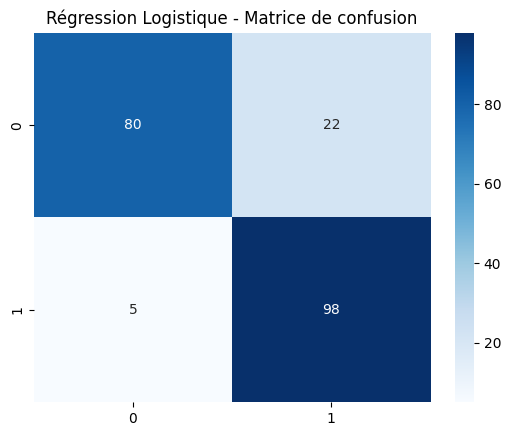

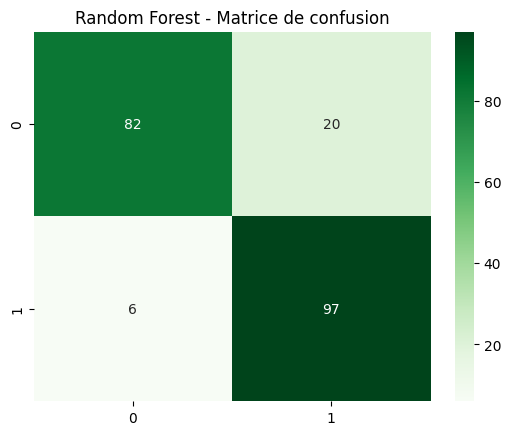

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice pour la régression logistique
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Régression Logistique - Matrice de confusion")
plt.show()

# Matrice pour Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Matrice de confusion")
plt.show()
